# Applied Statistics Assessment
*************************************

## Introduction
### Problem Set Solutions for Applied Statistics
This notebook contains my solutions to the assessment problem set for *Applied Statistics*, a module I am taking as part of a Higher Diploma in Computer Science and Data Analytics at Atlantic Technological University.


## Problem 1: Extending the Lady Tasting Tea
**********************************
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design

In [25]:
#Import Libraries
import math
import numpy as np
import random
import matplotlib.pyplot as plt 
import itertools

In [26]:
#Set up the experiment
cups = 12 #12 cups of tea are made
milk_first = 4 #4 of which have the milk added first 

math.comb(cups, milk_first) #math.comb will return the number of ways to choose 4 cups from 12, order does not matter

495

### `math.comb()` and the Combinations Formula 

- In the code cell above, `math.comb(n,k)` (see the [Python Documentation](https://docs.python.org/3/library/math.html#math.comb) for `math.comb(n,k)`) returned the number of ways to choose 4 cups from 12, without being able to choose the same cup twice, and the order the cups are chosen in does not matter.
- The calculation returned that there are 495 ways to choose 4 cups from 12. 
- The `math.comb(n,k)` function uses the **Combinations Formula** to return number of ways to choose k items from n items without repetition and without order.
$$ \frac{n!}{k!\times(n-k)!} $$

#### Detailed Explanation of the Combinations Formula:
Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _`

- In the scenario where the order in which the cups are chosen does matter, i.e. choosing cups `2`, `4`, `5`, `8`,  is not the same as choosing cups `8`, `4`, `5`, `2`, which is not the same as `2`, `5`, `8`, `4`, the number of ways to choose 4 cups in this scenario  ends up being: 

$$
12 \times 11 \times 10 \times 9  
$$
- This is because there are 12 options for the first cup to be placed in place 1.  
- When a cup has been put in place 1, there are 11 remaining options for place 2.
- When a cup has been put in place 2, there are 10 remaining options for place 3
- When a cup has been put in place 3, there are 9 remaining options for place 4. 

In [27]:
#In the scenario where the order of items chosen is irrelevant, the number of permutations of 4 items taken from 12 can have is 
twelve_p_four = 12*11*10*9
twelve_p_four

11880

#### Permutations of 4
- However, in this Lady Tasting Tea Experiment, we do not care about the order the cups are chosen.
- The amount of different ways in which the same 4 cups can be chosen is $4!$, or $4 \times 3 \times 2 \times 1$ 

In [28]:
# The number of different permutations 4 cups can have 
permutations_four_items = 4*3*2*1
permutations_four_items

24

- Therefore, dividing the number of ways to take 4 items from 12 items by the number of permutations those 4 items can have, will give the number of ways to choose 4 items from 12 items, without regard to the order of these 4 items. 

In [29]:
#The number of ways 4 items can be chosen from 12 items
twelve_choose_four = twelve_p_four/permutations_four_items 
twelve_choose_four

495.0

In [30]:
# Excecuting the experiment
labels = list(range(12)) #Label the cups 1 to 12
combs = list(itertools.combinations(labels, 4)) #Create a list with the 495 combinations of 4 cups that exist 
milk_cups = random.sample(labels, 4) #Create a list containing the actual combination of cups that contain the milk first
milk_cups

[0, 2, 11, 1]

### `itertools.combinations()`
- In the code cell above, `itertools.combinations()` (see the [Python Documentation](https://docs.python.org/3/library/itertools.html#itertools.combinations) for the `itertools.combinations()` function) returns a set containing all possible 495 combinations of 4 cups that can be chosen. 
- This is wrapped in a `list()` wrapper so that the list of combinations can be passed to the `for` loop excecuted in the code cell below. 

In [31]:
#Get the intersection between the list of 495 combinations and the actual set with milk first 
milk_cups_set = set(milk_cups) #Create a set out of the list of cups containing the milk, as the .intersections() only accepts sets
number_overlaps = [] #Create an empty list that can contain the number of overlapping cups in each combination tested

for comb in combs:
    comb_set = set(comb) # for each combination in the list - first make it into a set so that the .intersections() function works
    overlap = comb_set.intersection(milk_cups_set) # use intersection() to ascertain which (if any) of the cups in your comb overlap with the set of milk_cups
    number_overlaps.append(len(overlap))# Add the number of cups that overlap to the list created above 

### `.intersection()`
- In the code cell above, the operator `.intersection()` is used to find the intersection between two sets, and return a set that includes only the common elements present in both sets.
- See the [this article](https://www.geeksforgeeks.org/python/python-set-operations-union-intersection-difference-symmetric-difference/) for an explanation of the operations can can be performed on sets in Python, including the `.intersection()` operation.
- In this instance, `.intersection()` is used to find the intersection between the combination of cups being tested and the actual combination of cups that contain the milk first, returning a set with the labels that are common to both.
- The length of the returned set will return the number of milk cups present in the combination being tested.
- This number is added to the list created `number_overlaps`.   

In [38]:
# In how many of the 495 combinations does 1 milk cup, 2 milk cups, 3 milk cups, and 4 milk cups show up?
counts = np.unique(number_overlaps, return_counts=True) #np.unique will return an array of the unique numbers occuring in the list number_overlaps, and return_counts = True will return an array with the number of times each of these numbers occurs
print(counts)

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))


### `np.unique()`
- In the above cell, `np.unique()` is performed on the `number_overlaps` list created in the for loop above. 
- This will return return an array of the unique numbers occuring in the list `number_overlaps`, and specifying `return_counts = True` will return an array with the number of times each of these numbers occurs.  
- The Numpy Documentation for this function can be read [here](https://numpy.org/devdocs/reference/generated/numpy.unique.html#numpy-unique).
- From the arrays returned, the following 
    - 70 of the 495 possible combinations of cups have no milk cups in the set of cups chosen.
    - 224 of the 495 possible combinations have 1 milk cup in the set chosen.  
    - 168 of the 495 possible combinations have 2 milk cups in the set.
    - 32 of the 495 possible combinations have 3 milk cups in the set.
    - And obviously, there is only one possible combination containing all 4 milk cups. 

Text(0.5, 1.0, 'Distribution of Milk Cups in 495 Possible Combinations')

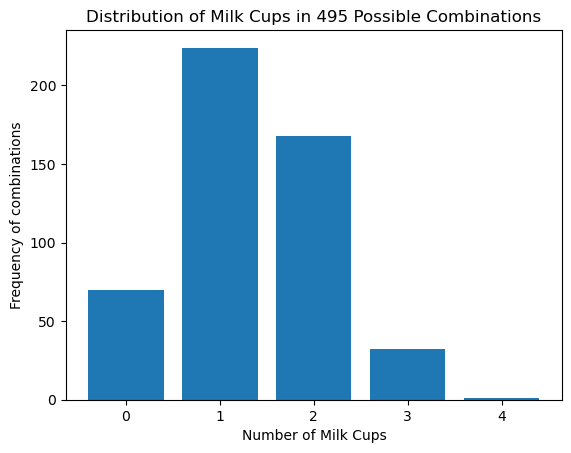

In [44]:
#Creating a barchart outlining the number of combinations containing 0, 1, 2, 3, and 4 milk cups
fig, ax = plt.subplots()
ax.bar(counts[0], counts[1]) 
ax.set_xlabel("Number of Milk Cups")
ax.set_ylabel("Frequency of combinations")
ax.set_title("Distribution of Milk Cups in 495 Possible Combinations")

In [ ]:
#From the above overlaps in the list of 495 possible combinations
p_zero_cups = 70/495 #The probability that none of the cups chosen overlap with the set of 4 cups containing milk first 
p_one_cup = 224/495 #The probability that only 1 of the cups chosen overlap with the set of 4 cups containing milk first
p_two_cups = 168/495  #The probability that only 2 of the cups chosen overlap with the set of 4 cups containing milk first
p_three_cups = 32/495 #The probability that only 3 of the cups chosen overlap with the set of 4 cups containing milk first
p_all_cups = 1/495 #The probability that all of the cups chosen overlap with the set of 4 cups containing milk first 

p_at_least_three_cups = (1+32)/495 #The probability that at least 3 of the cups chosen overlap with the set of 4 cups containing milk first
p__at_least_two_cups = (1+32+168)/495  #The probability that at least 2 of the cups chosen overlap with the set of 4 cups containing milk first
p_at_least_one_cup = (1+32+168+224)/495  #The probability that at least 1 of the cups chosen overlap with the set of 4 cups containing milk first

### Hypothesis Testing 

#### $H0$ Null Hypothesis: 
- She cannot tell the difference - she is choosing the cups at random.  

#### $Ha$ Alternative Hypothesis
- She is not choosing the cups at random - this Lady knows her tea!

### Performing the Hypothesis Test 
- First, we need to compute the *p*-value for each of the options, assuming the null hypothesis that she cannot distinguish the cup. 
    - The code cell above computes the *p*-value for each possible event. 
- We then need to set a significance level. If the *p*-value falls below the significance level we have set, we can reject the null hypothesis in favour of the alternative hypothesis that she is not choosing at random.
    - Setting a significance level of 0.05 will give us a 5% chance of incorrectly accepting or rejecting the null hypothesis. 
$$ 
\alpha = 0.05 
$$

In [34]:
alpha = 0.05 #Set the significance level - 0.05 will give us a 5% chance of incorrectly accepting or rejecting the null hypothesis
print(f"The p-value for correctly choosing the 4 milk first cups at random is {p_all_cups:.3f}.")
print(f"This is below our significance level of {alpha}, so the result is statistically significant.")
print("Therefore, if the lady chooses 4 cups correctly, we can reject the null hypothesis in favour of the alternative hypothesis.")


The p-value for correctly choosing the 4 milk first cups at random is 0.002.
This is below our significance level of 0.05, so the result is statistically significant.
Therefore, if the lady chooses 4 cups correctly, we can reject the null hypothesis in favour of the alternative hypothesis.


In [ ]:
print(f"The p-value for choosing 3 correct cups is {p_three_cups:.3f}, which is above our significance level of {alpha}.")
print("This result is not statistically significant. \nIf the lady chooses 3 cups correctly, we cannot reject the null hypothesis at the 5% significance level.")

The p-value for choosing 3 correct cups is 0.065, which is above our significance level of 0.05.
This result is not statistically significant. 
If the lady chooses 3 cups correctly, we cannot reject the null hypothesis at the 5% significance level.


### Adjusting the *p*-value threshold
I would not consider extending or relaxing the *p*-value threshold compared to the original design. In the extended experiment, the significance probability (i.e., the probability that this would occur by random chance) of correctly identifying all 4 or at least 3 milk first cups correctly is lower than in the original experiment using only 8 cups. Identifying the 4 milk cups by random guessing is less likely in our extended experiment. However, extending the experiment to make the identification of the milk cups more difficult, and then adjusting the significance level such that the new significance probabilities will be considered statistically significant, 

is not a good approach to take to a statistical question. It is better practice to use the typical *p*-value threshold of 0.05, and build the experiments correctly.  

Adjust the p value if you want to at the cost of accepting more false positives, you want to maximise the chances of accepting a true postive - type I and type II errors - like when detecting cancers for example

When sample size is small/ data is v noisy - you want to set p value threshold to like 0.1 to identify trends you can then follow up on with more stringent tests


 


## Problem 2: Normal Distribution
************************
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased